In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data

books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
print("Shape of the Books : ",books.shape)
print("Shape of the Ratings : ",ratings.shape)
print("Shape of the Users : ",users.shape)

Shape of the Books :  (271360, 8)
Shape of the Ratings :  (1149780, 3)
Shape of the Users :  (278858, 3)


In [7]:
print("Data Type for Books :\n",books.dtypes)
print("\nData Type for Ratings :\n",ratings.dtypes)
print("\nData Type for Users :\n",users.dtypes)

Data Type for Books :
 ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

Data Type for Ratings :
 User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

Data Type for Users :
 User-ID       int64
Location     object
Age         float64
dtype: object


In [8]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [9]:
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating


In [10]:
users[users.duplicated()]

,User-ID,Location,Age


In [11]:
#Merging datasets users and ratings based on 'Used-ID'
user_rating=pd.merge(users,ratings,on='User-ID')
user_rating.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [12]:
#Merging datasets user_rating and books based on 'ISBN'
user_book_rating=pd.merge(user_rating,books,on='ISBN')
user_book_rating.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [13]:
user_book_rating.shape

(1031136, 12)

In [14]:
user_book_rating.isna().sum().sort_values(ascending=True)

User-ID                     0
Location                    0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Year-Of-Publication         0
Image-URL-S                 0
Image-URL-M                 0
Book-Author                 1
Publisher                   2
Image-URL-L                 4
Age                    277835
dtype: int64

In [15]:
user_book_rating.isna().sum().sort_values(ascending=True)/len(ratings)*100

User-ID                 0.000000
Location                0.000000
ISBN                    0.000000
Book-Rating             0.000000
Book-Title              0.000000
Year-Of-Publication     0.000000
Image-URL-S             0.000000
Image-URL-M             0.000000
Book-Author             0.000087
Publisher               0.000174
Image-URL-L             0.000348
Age                    24.164188
dtype: float64

##### 277835 (24 %) null values found in the feature 'Age' . Hence we can remove this feature

In [16]:
user_book_rating.dtypes

User-ID                  int64
Location                object
Age                    float64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
dtype: object

In [17]:
user_book_rating[user_book_rating.duplicated()]

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [18]:
user_book_rating.describe().round(2)

,User-ID,Age,Book-Rating
count,1031136.00,753301.0,1031136.00
mean,140594.50,37.4,2.84
std,80524.66,14.1,3.85
min,2.00,0.0,0.00
25%,70415.00,28.0,0.00
50%,141210.00,35.0,0.00
75%,211426.00,45.0,7.00
max,278854.00,244.0,10.00


In [19]:
# df_left=pd.merge(user_rating,books,on='ISBN',how='left')
# missed=df_left[df_left['Book-Title'].isnull()]
# missed=missed.reset_index(drop=True)
# missed['ISBN'].sort_values().tail(50)

In [20]:
# %%time
# fixed_isbn=pd.DataFrame(columns=['Index','Wrong_ISBN','Correct_ISBN'])
# for num in range(len(missed)):
#     if not books[books['ISBN'].str.contains(re.sub(r'[^\w\s]', '', missed['ISBN'][num]))].empty:
#         fixed_isbn=fixed_isbn.append({'Index':num,'Wrong_ISBN':missed['ISBN'][num],'Correct_ISBN':books[books['ISBN'].str.contains(re.sub(r'[^\w\s]', '', missed['ISBN'][num]))].reset_index().iloc[0].at['ISBN']},ignore_index=True)
# fixed_isbn

### Data Visualization

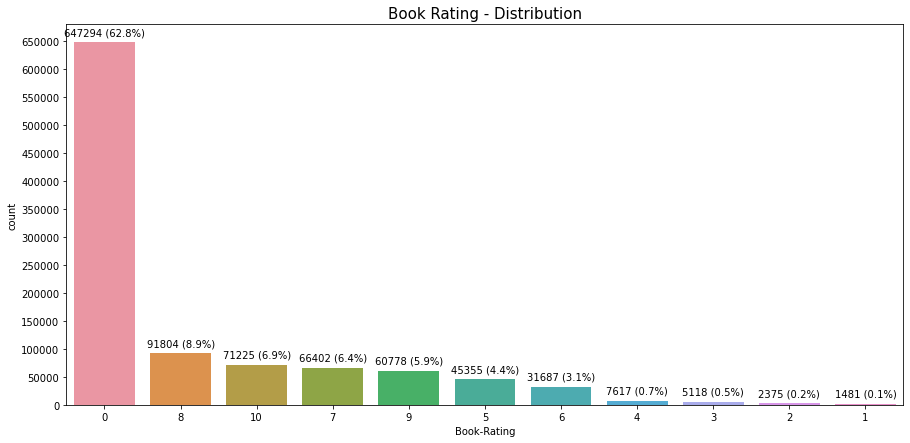

In [21]:
plt.figure(figsize=(15,7))
ax=sns.countplot(user_book_rating['Book-Rating'],order=user_book_rating['Book-Rating'].value_counts().index)
abs_values=user_book_rating['Book-Rating'].value_counts().values
rel_values=user_book_rating['Book-Rating'].value_counts(normalize=True).values*100
labels=[f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values,rel_values)]    
ax.bar_label(container=ax.containers[0],labels=labels,padding=5)
plt.yticks(np.arange(0, 700000, step=50000))
plt.title('Book Rating - Distribution',size=15)
plt.show()

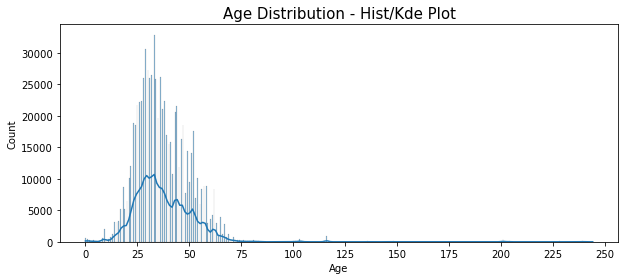

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(user_book_rating['Age'],kde=True)
plt.xticks(np.arange(0, 255, step=25))
plt.title('Age Distribution - Hist/Kde Plot',size=15)
plt.show()

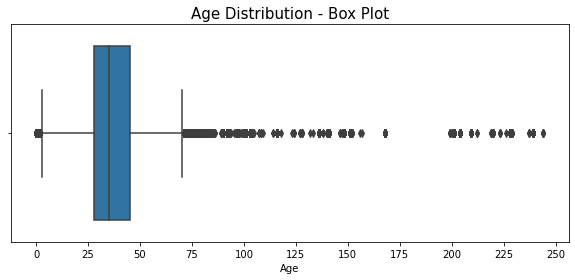

In [23]:
plt.figure(figsize=(10,4))
sns.boxplot(user_book_rating['Age'])
plt.xticks(np.arange(0, 255, step=25))
plt.title('Age Distribution - Box Plot',size=15)
plt.show()

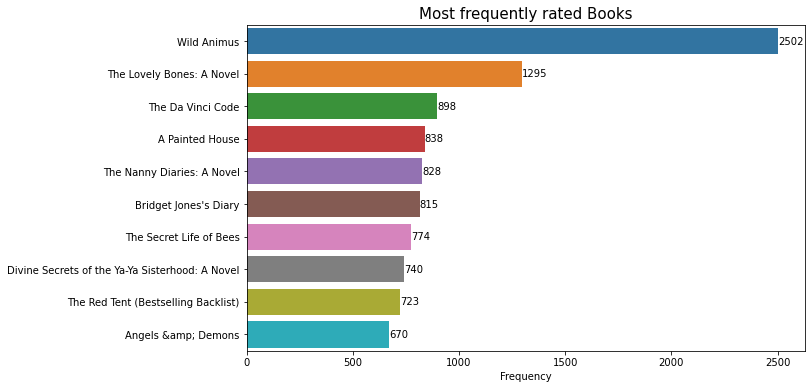

In [24]:
plt.figure(figsize=(10,6))
book_freq=user_book_rating['Book-Title'].value_counts().head(10)
ax=sns.barplot(book_freq,book_freq.index,orient='h')
abs_values=book_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated Books',size=15)
plt.show()

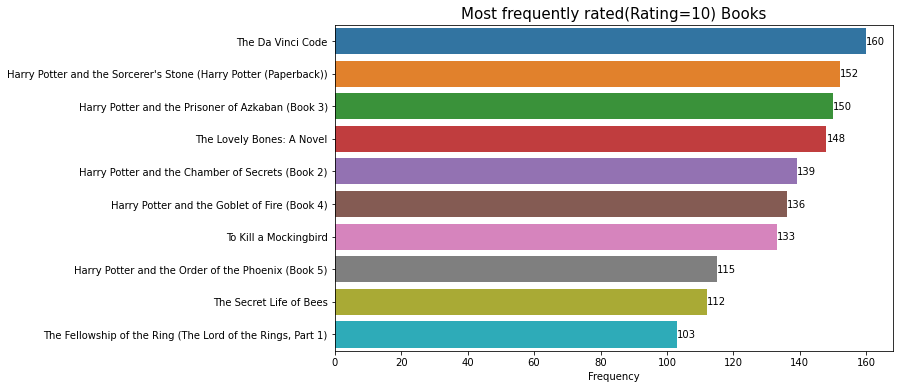

In [25]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book-Rating']==10]['Book-Title'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=10) Books',size=15)
plt.show()

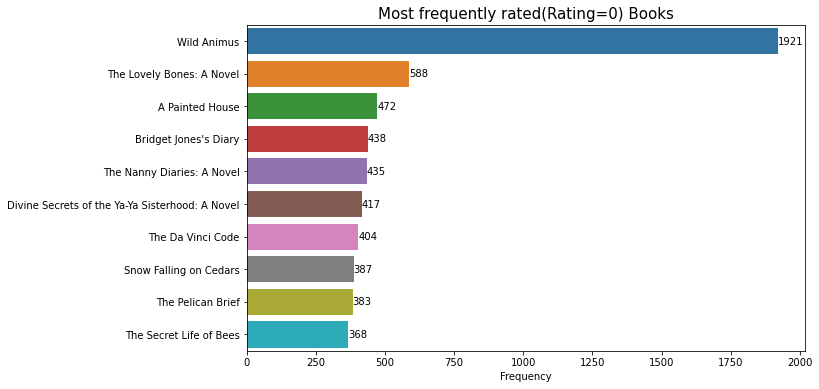

In [26]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book-Rating']==0]['Book-Title'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=0) Books',size=15)
plt.show()

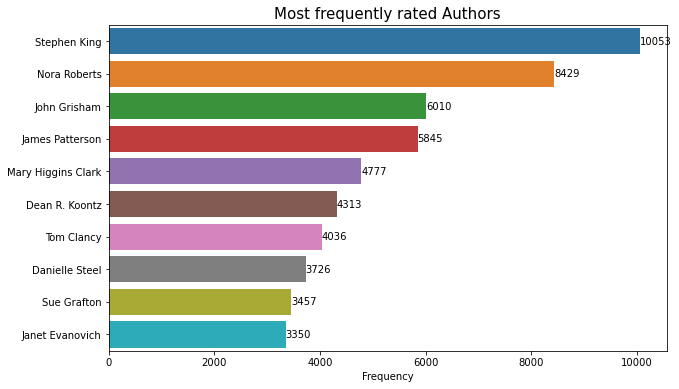

In [27]:
plt.figure(figsize=(10,6))
book_freq=user_book_rating['Book-Author'].value_counts().head(10)
ax=sns.barplot(book_freq,book_freq.index,orient='h')
abs_values=book_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated Authors',size=15)
plt.show()

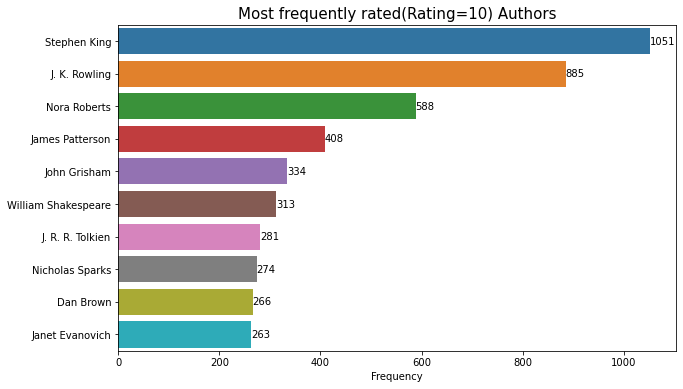

In [28]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book-Rating']==10]['Book-Author'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=10) Authors',size=15)
plt.show()

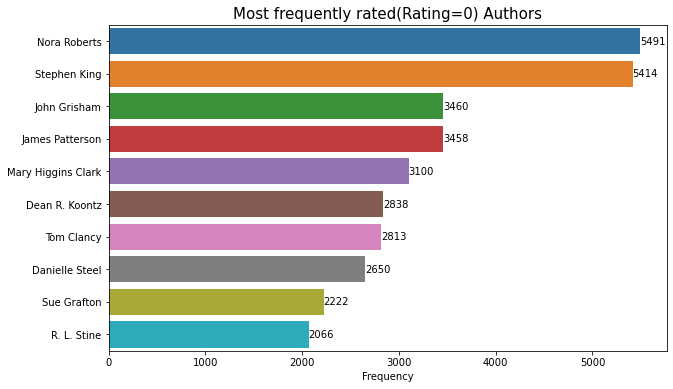

In [29]:
plt.figure(figsize=(10,6))
book_rating_freq=user_book_rating[user_book_rating['Book-Rating']==0]['Book-Author'].value_counts().head(10)
ax=sns.barplot(book_rating_freq,book_rating_freq.index,orient='h')
abs_values=book_rating_freq.values
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('Most frequently rated(Rating=0) Authors',size=15)
plt.show()

### Data Cleaning/Preparation

In [30]:
#Replace hyphen with underscore
#Drop Age column since there is 25% of null values and distribution is weird.

user_book_rating=user_book_rating.rename(columns = {'User-ID':'User_ID','Book-Rating':'Book_Rating','Book-Title':'Book_Title',
                                  'Book-Author':'Book_Author','Year-Of-Publication':'Year_Of_Publication',
                                  'Image-URL-S':'Image_URL_S', 'Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})
user_book_rating=user_book_rating.drop(columns='Age')
user_book_rating.head(2)

,User_ID,Location,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [31]:
user_book_rating[user_book_rating['Book_Author'].isnull()]

,User_ID,Location,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
857604,98647,"selayang, selangor, malaysia",9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


##### Can't able to find Book Author in google ! Can we remove this row ?

In [32]:
user_book_rating[user_book_rating['Publisher'].isnull()]

,User_ID,Location,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
857163,98391,"morrow, georgia, usa",193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
857174,98391,"morrow, georgia, usa",1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


**Missing Publisher Names :**

193169656X - NovelBooks, Inc

1931696993 - CreateSpace Independent Publishing Platform

Can we replace NaN with these Publisher Names ?

In [33]:
user_book_rating[user_book_rating['Image_URL_L'].isnull()]

,User_ID,Location,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
906829,130571,"summerville, south carolina, usa",0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN
913994,137190,"rennes, bretagne, france",2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
946370,169663,"towson, maryland, usa",078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
946371,227771,"savion, n/a, israel",078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


#### Need to alter values between columns

**Missing Author Names :**

0789466953 -> Buckley Jr., James

2070426769 -> Le Clezio, Jean-Marie Gustave

078946697X -> Teitelbaum, Michael

Can we add these Publisher Names ?

In [34]:
len(user_book_rating[user_book_rating['Year_Of_Publication']==0])

12744

##### 12744 records have Year of Publication = 0. Can we impute median or mean ?